In [1]:
#Import pandas, matplotlib.pyplot, and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [2]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# upload credit table data

credit = pd.read_csv("credit_record.csv")

credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
credit['ID'].nunique()

45985

In [5]:
# upload application data

app = pd.read_csv("application_record.csv")

In [7]:
# check how many records match in both datasets

len(set(credit['ID']).intersection(set(app['ID'])))

36457

In [8]:
# drop duplicates

app = app.drop_duplicates('ID', keep='last') 

In [9]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [10]:
# merge 2 credit tables

crecordgb = credit.groupby('ID').agg(max).reset_index()
crecordgb.head() 

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001712,0,C
2,5001713,0,X
3,5001714,0,X
4,5001715,0,X


In [11]:
# merge with app table

df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,X
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0,X
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0,X
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-22,X


In [12]:
# convert days to years
df['DAYS_BIRTH'] = round(df['DAYS_BIRTH']/-365,0).astype(int)
df['DAYS_EMPLOYED'] = round(df['DAYS_EMPLOYED']/-365,0).astype(int)


df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2,0,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,1,0,0,NaN,2,0,X
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,1,0,0,0,Security staff,2,0,X
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1,0,X
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,Sales staff,1,-22,X


<AxesSubplot:>

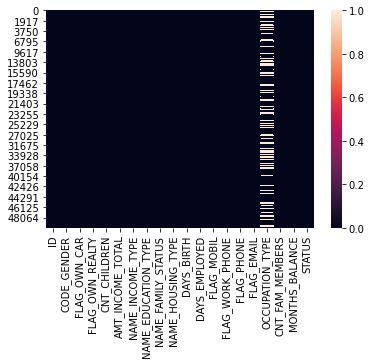

In [13]:
# check for nulls

sns.heatmap(df.isnull())

In [17]:
list(df.columns)

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'STATUS']

In [14]:
# remove columns

df.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','OCCUPATION_TYPE'], inplace=True)

In [15]:
# remove IDs

df.drop(columns =['ID'], inplace=True)

df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2,0,X
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,X
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,-22,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48,7,2,0,X
434809,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34,4,2,0,C
434810,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,2,0,C
434811,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49,2,2,0,2


In [16]:
#renamed columns

df.rename(columns = {'CODE_GENDER':'GENDER','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Property','CNT_CHILDREN':'Children', 
                                     'AMT_INCOME_TOTAL':'Income', 
                                     'NAME_INCOME_TYPE':'Job', 'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'Martial_Status', 
                                     'NAME_HOUSING_TYPE':'Housing', 'DAYS_BIRTH':'Age','DAYS_EMPLOYED': 'Employed_Years','FLAG_MOBIL': 'Cell_Phone','FLAG_WORK_PHONE':'Work_Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation', 'CNT_FAM_MEMBERS':'Family_Size'}, inplace=True)




df





,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2,0,X
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2,0,X
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,X
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,-22,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48,7,2,0,X
434809,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34,4,2,0,C
434810,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,2,0,C
434811,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49,2,2,0,2


In [17]:
# check for nulls

df.isnull().sum()

GENDER            0
Car               0
Property          0
Children          0
Income            0
Job               0
Education         0
Martial_Status    0
Housing           0
Age               0
Employed_Years    0
Family_Size       0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [18]:
df.to_csv('df.csv', index=False)